# RIO-125: Classification Model - Build a Model that Classifies the Side Effects of a Drug

### By- Bhagyashri Kankekar

## Import libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline

## Get the data

In [5]:
df = pd.read_csv("drugeffects.csv",index_col=0)
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3106
Data columns (total 5 columns):
urlDrugName      3107 non-null object
rating           3107 non-null int64
effectiveness    3107 non-null object
condition        3106 non-null object
sideEffects      3107 non-null object
dtypes: int64(1), object(4)
memory usage: 145.6+ KB
None
            rating
count  3107.000000
mean      7.006115
std       2.937582
min       1.000000
25%       5.000000
50%       8.000000
75%       9.000000
max      10.000000


Observe, there are no null values in the data, and also, there are no outliers in the data.

## Visualization

let's visualize to understand data even better.

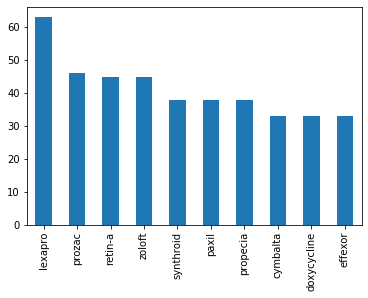

In [10]:
df['urlDrugName'].value_counts().head(10).plot(kind='bar')

This are the top 10 drugs in our data.

Text(0.5, 0, 'Ratings')

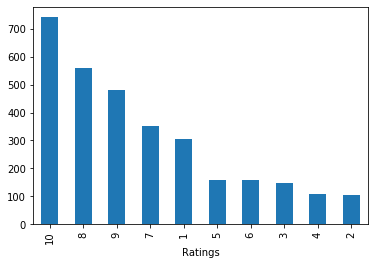

In [13]:
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')

Above plot shows drugs by their ratings(10-0). 

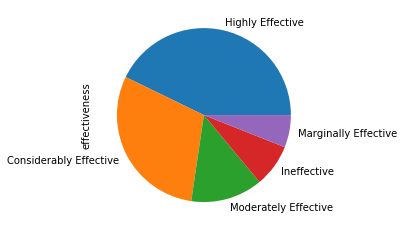

In [22]:
df['effectiveness'].value_counts().plot(kind='pie')


We can see that most of the drugs are highly effective.

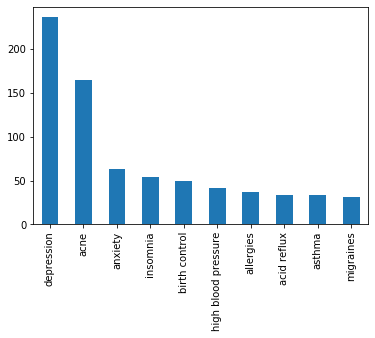

In [23]:
df['condition'].value_counts().head(10).plot(kind='bar')


Observed that depression and acne patients more than other diseases. 

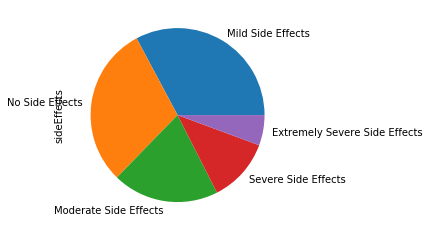

In [27]:
df['sideEffects'].value_counts().head(10).plot(kind='pie')


## Data preprocessing

Let's seperate dependant and independant variables. 

In [28]:
target = df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [29]:
# now we will convert the catagorical data to numeric.

cols=['urlDrugName', 'effectiveness', 'condition']

for x in cols:
    df[x] = pd.factorize(df[x])[0]
    
target = pd.factorize(target)[0]
df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [31]:
target

array([0, 1, 2, ..., 4, 0, 4], dtype=int64)

In [32]:
#scaling the data before modelling

scaler = StandardScaler()
df = scaler.fit_transform(df)

df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [ ]:
#splitting data into training and testing data sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)  # 70% training and 30% test